In [169]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np

In [170]:
DATA_PATH = "raw/"
ITERATIONS = ["_1","_2","_3","_4","_5"]
#DEVICES = ["k120", "6312kw" ,"nixdorf", "bt58", "rival" ,"intelli_new", "intelli_og", "apple1152", "sunplus", "dragonrise_green", "g5",
#"g300", "sigma", "exxter", "px1800", "gembird", "g15", "wingman", "dragonrise_black", "arduino", "rapoo", "trust_oni_wireless", "xboxone_wireless",
#"dualshock4_wired", "xbox360_wireless", "tramani_wired", "dualshock3_wired", "xbox360_wired", "adns5700", "logilink0043",
#"diamondback", "rx250", "nvidiashield", "g700", "sk9620", "roccat", "unicomp"]

DEVICES = ["k120", "6312kw" ,"nixdorf", "bt58", "rival" ,"intelli_new", "intelli_og", "apple1152", "sunplus", "dragonrise_green", "g5",
"g300", "sigma", "px1800", "gembird", "g15", "wingman", "dragonrise_black", "rapoo", "trust_oni_wireless", "xboxone_wireless",
"dualshock4_wired", "xbox360_wireless", "tramani_wired", "dualshock3_wired", "xbox360_wired", "adns5700", "logilink0043",
"diamondback", "rx250", "nvidiashield", "g700", "sk9620", "roccat", "unicomp"]

POLLING_RATES = {"k120":10, "6312kw":-1 ,"nixdorf":-1, "bt58":10, "rival":1 ,"intelli_new":1, "intelli_og":-1, "apple1152":10, "sunplus":10, "dragonrise_green":10, "g5":10,
"g300":1, "sigma":10, "exxter":10, "px1800":10, "gembird":10, "g15":24, "wingman":10, "dragonrise_black":10, "arduino":1, "rapoo":-1, "trust_oni_wireless":10, "xboxone_wireless":-1,
"dualshock4_wired":5, "xbox360_wireless":-1, "tramani_wired":10, "dualshock3_wired":1, "xbox360_wired":-1, "adns5700":10, "logilink0043":10,
"diamondback":10, "rx250":10, "nvidiashield":1, "g700":1, "sk9620":-1, "roccat":1, "unicomp":10}


MODES = ["default_polling", "1ms_polling"]

all_raw_data = []

for device in DEVICES:
    for mode in MODES:
        for iteration in ITERATIONS:
            if mode == "default_polling":
                try:
                    path = DATA_PATH + mode + "/" + "AUTO_" + device + "_0ms" + iteration +".csv"
                    #print(path)
                    currentFile = pd.read_csv(path, comment="#" ,delimiter=';')
                except:
                    print("file missing: ", mode, device)
                currentFile["device"] = device
                
                label = POLLING_RATES[device]
                if(label == -1):
                    label = "unknown"
                label = "default {}ms".format(label)
                currentFile["polling"] =label
            else:
                try:
                    currentFile = pd.read_csv(DATA_PATH + mode + "/" + "AUTO_" + device + "_1ms", + iteration, comment="#")
                except:
                    print("file missing: ", mode, device)
                currentFile["device"] = device
                currentFile["polling"] = "forced 1ms"
            print(type(currentFile))
            print(len(currentFile))        
            all_raw_data.append(currentFile)
all_data = pd.concat(all_raw_data)
#all_data["latency (ms)"] = all_data["latency (s)"] * 1000.0

<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling k120
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling k120
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling 6312kw
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling 6312kw
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling 6312kw
<class 

<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling xboxone_wireless
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling xboxone_wireless
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling xboxone_wireless
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling xboxone_wireless
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling dualshock4_wired
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling dualshock4_wired
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling dualshock4_wired
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling dualshock4_wired
<class 'pandas.core.frame.DataFrame'>
1000
file missing:  1ms_polling dualshock4_wired
<c

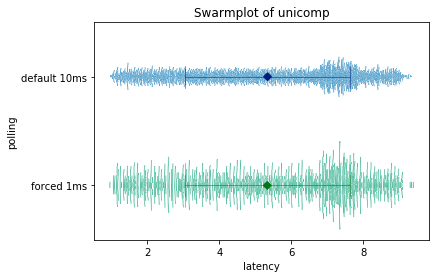

In [171]:
values = all_data[(all_data["device"]) == "wingman"]

plt.title('Swarmplot of '+ device)

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, errwidth=0.5, capsize=.2)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

#plt.savefig("svg/test1.svg")
#plt.savefig("png/test1.png")

k120
6312kw
nixdorf
bt58
rival
intelli_new
intelli_og
apple1152
sunplus
dragonrise_green
g5
g300
sigma
px1800
gembird
g15
wingman
dragonrise_black
rapoo
trust_oni_wireless
xboxone_wireless
dualshock4_wired
xbox360_wireless
tramani_wired
dualshock3_wired
xbox360_wired
adns5700
logilink0043
diamondback
rx250
nvidiashield
g700
sk9620
roccat
unicomp


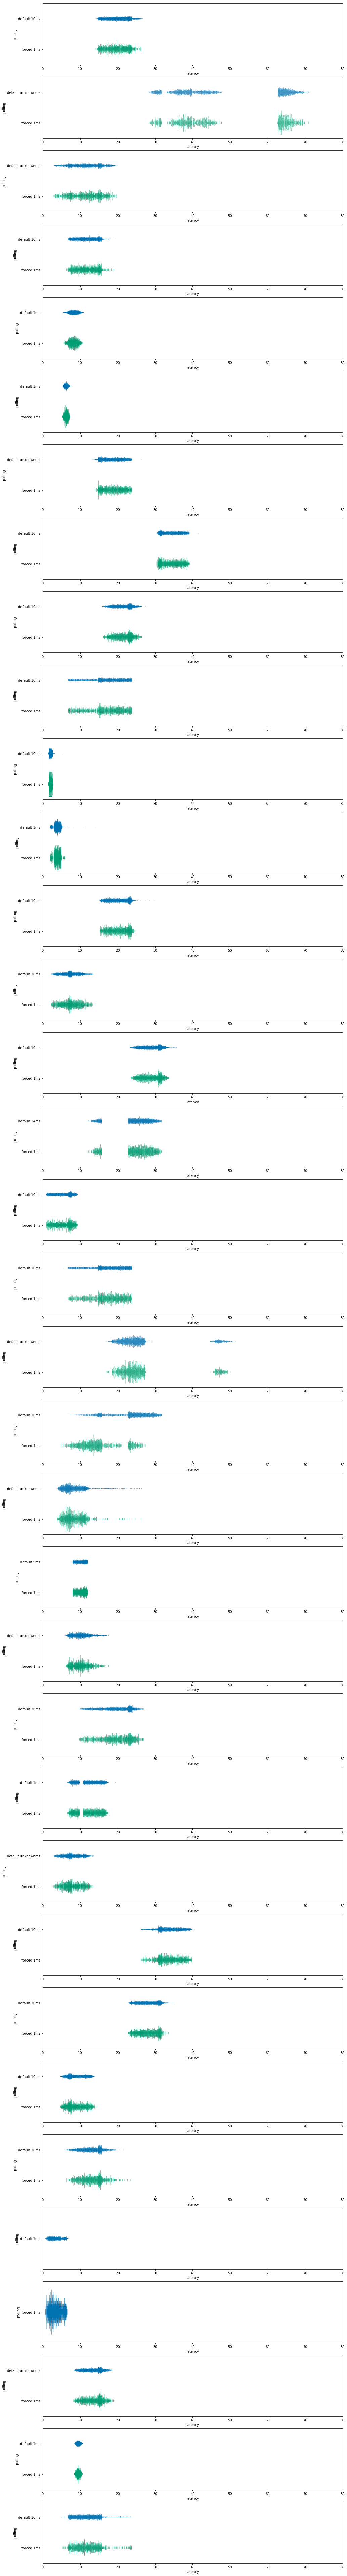

In [150]:
#Plotting all devices in one picture
i = 0

#plt.xlim(0, 80)
fig, axes = plt.subplots((len(DEVICES)), 1)


fig.set_figheight(4 * len(DEVICES))
fig.set_figwidth(16)

#fig(xlim = [0,80])


#axes.set_xlabel("latency (ms)")
#axes = plt.gca()
#axes.set_xlim([0,80])



for device in DEVICES:
    values = all_data[(all_data["device"]) == DEVICES[i]]

    plt.title('Swarmplot of '+ device)
    #sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set2",size=1,orient="h",alpha=1, ax=axes[i])    
    
    #point_plot = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1, ax=axes[i], capsize=.2)
    swarm_plot = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0, edgecolors='w', ax=axes[i])

    POLLING_RATES[device]
    
    axes[i].set_xlim(0, 80)
    i = i+1
    print(device)


plt.savefig("svg/allDevices.svg")
plt.savefig("png/allDevices.png")

k120
6312kw
nixdorf
bt58
rival
intelli_new
intelli_og
apple1152
sunplus
dragonrise_green
g5
g300
sigma
px1800
gembird
g15
wingman
dragonrise_black
rapoo
trust_oni_wireless


/home/lzrdwzrd/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xboxone_wireless
dualshock4_wired
xbox360_wireless
tramani_wired
dualshock3_wired
xbox360_wired
adns5700
logilink0043
diamondback
rx250
nvidiashield
g700
sk9620
roccat
unicomp


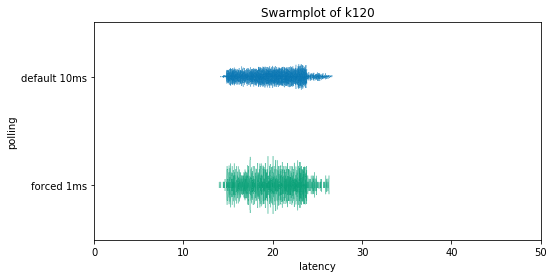

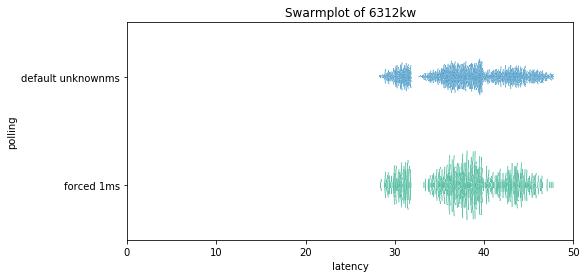

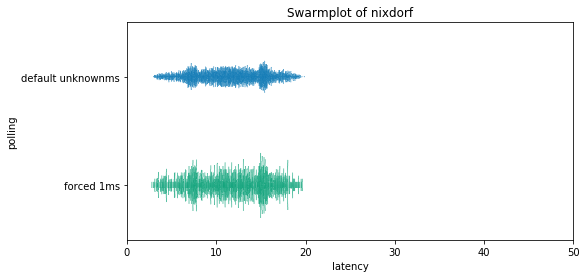

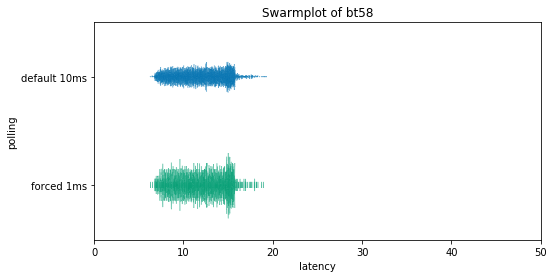

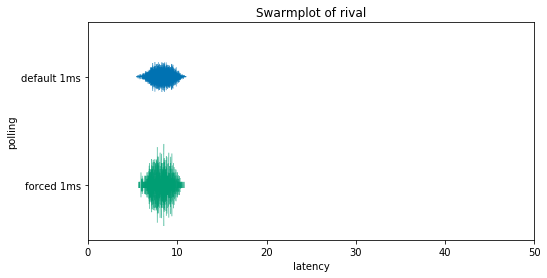

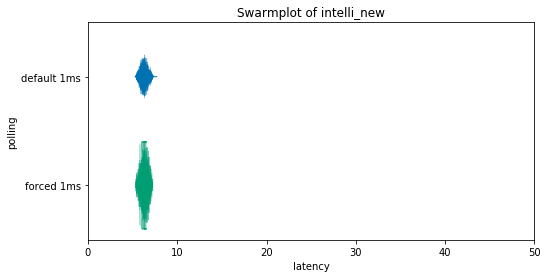

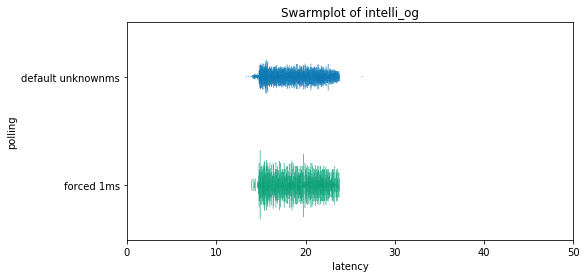

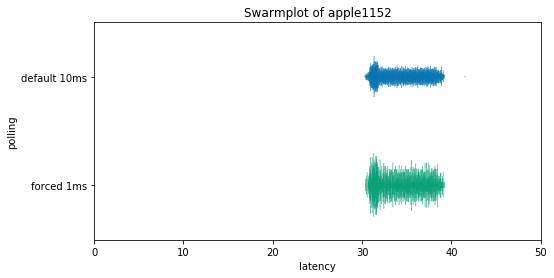

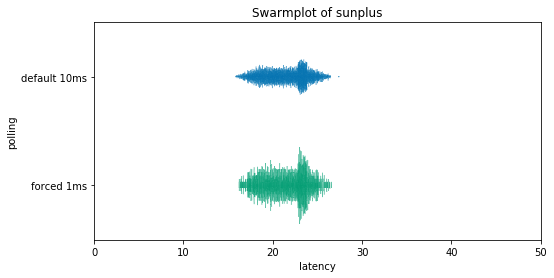

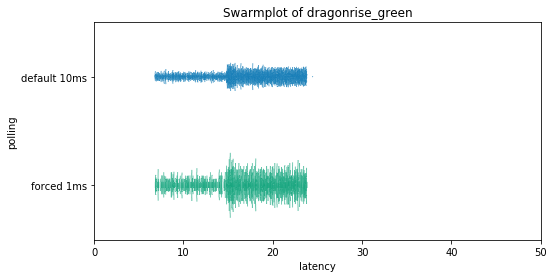

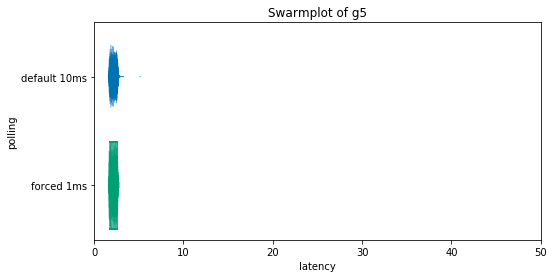

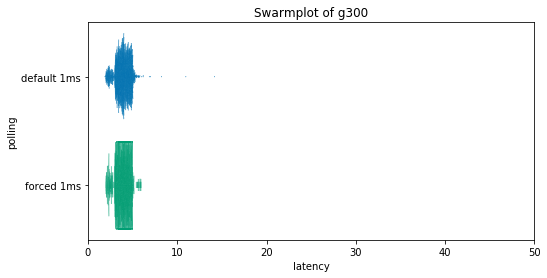

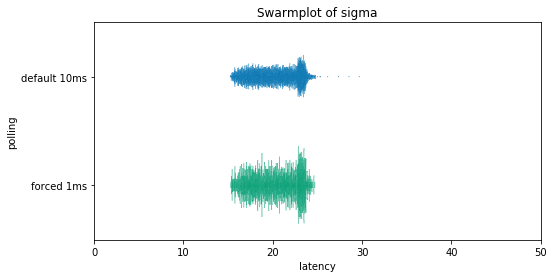

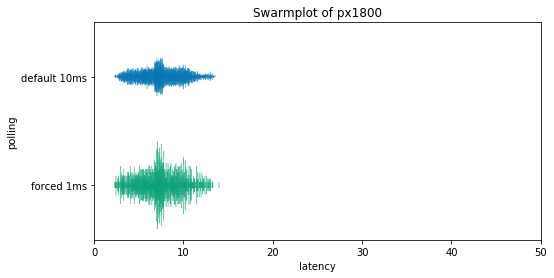

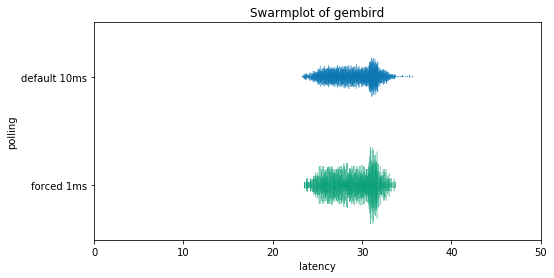

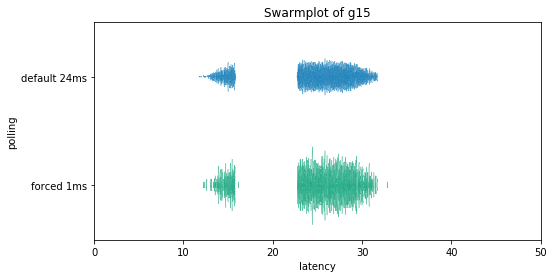

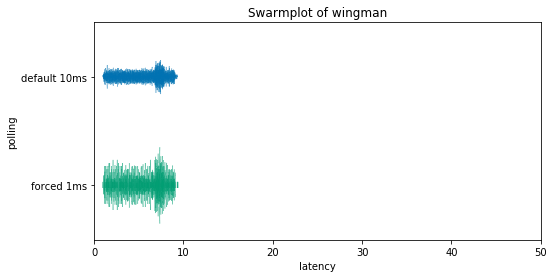

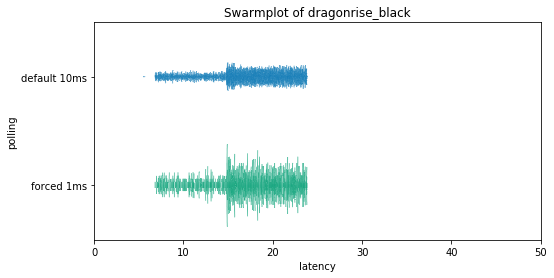

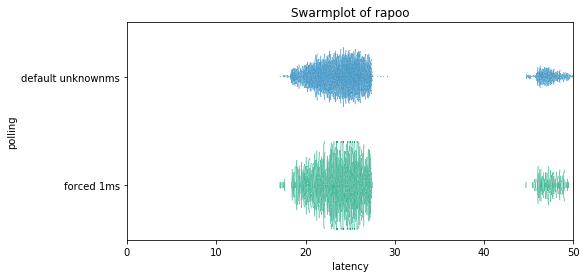

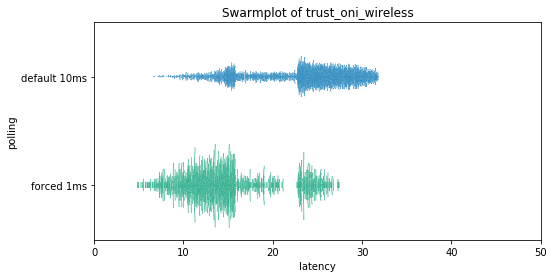

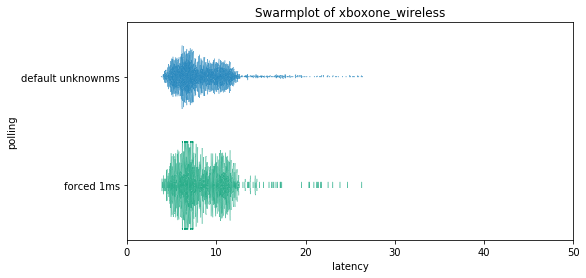

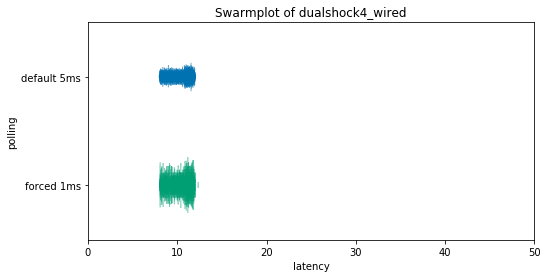

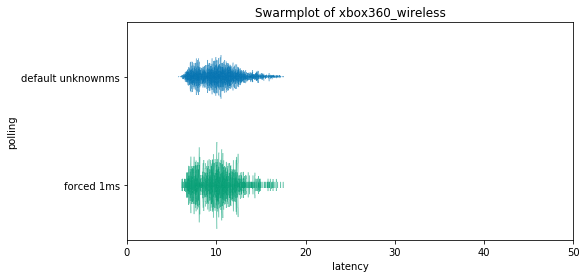

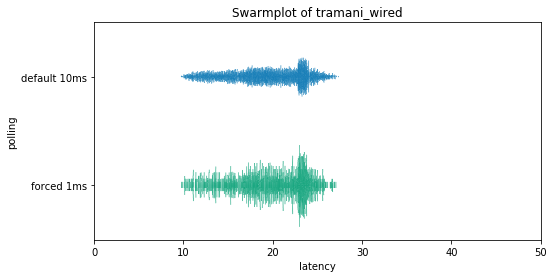

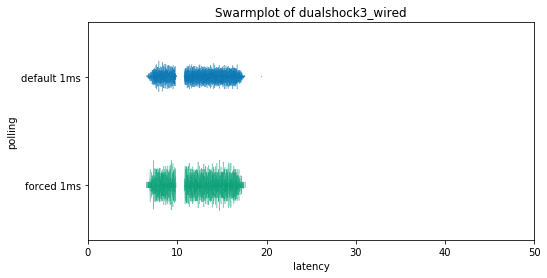

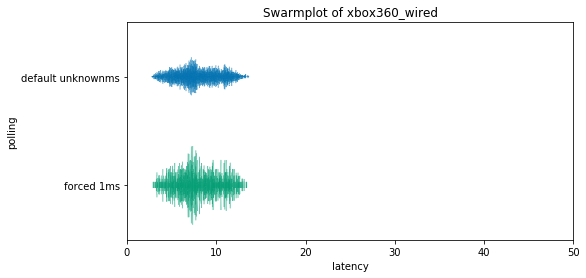

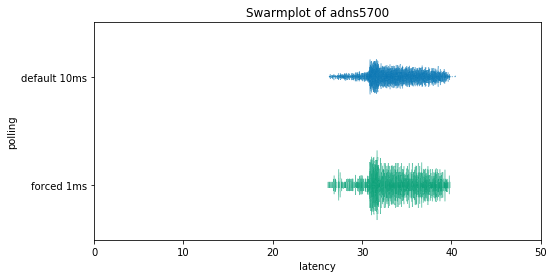

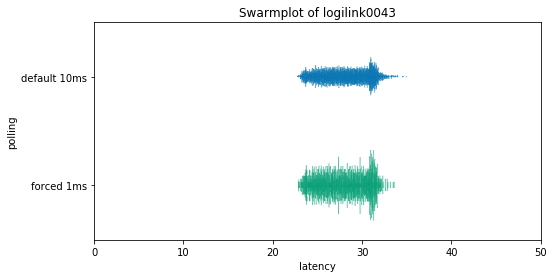

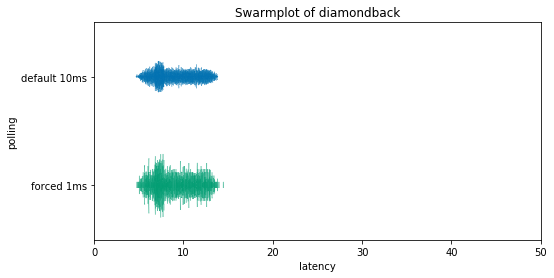

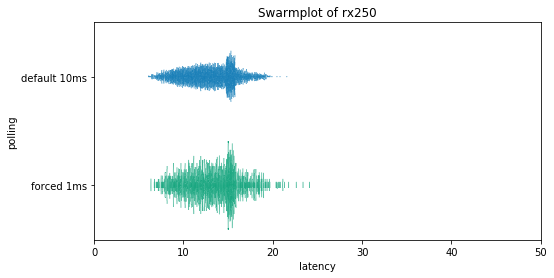

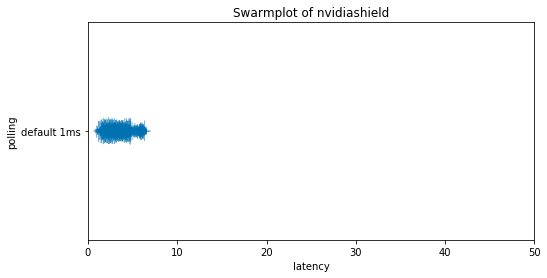

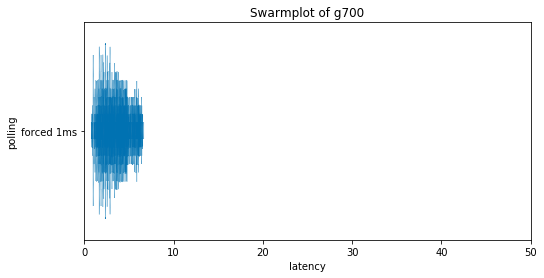

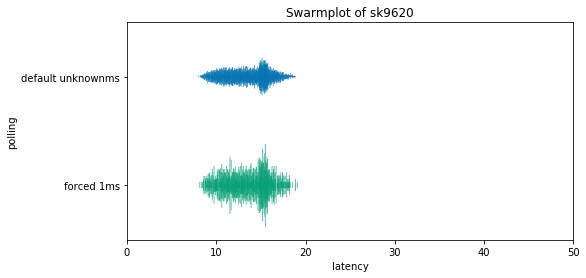

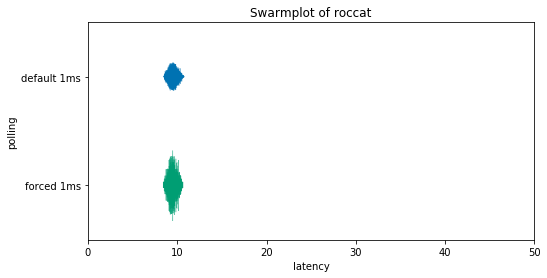

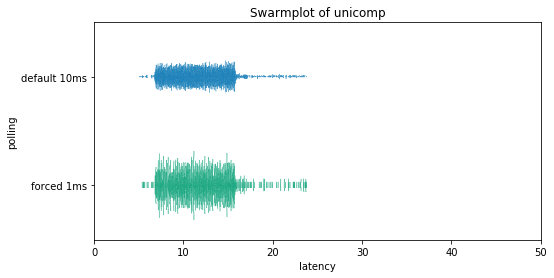

In [168]:
i = 0

import os


for device in DEVICES:
    fig, axes = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(8)
    
    values = all_data[(all_data["device"]) == DEVICES[i]]
    plt.title('Swarmplot of '+ device)
    ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)
    ax.set_xlim(0, 50)
       
    
    i = i+1
    print(device)
    plt.savefig("png/{}.png".format(device), dpi=600)
    
    # automatically print it - use carefully!
    #os.system("lp png/{}.png".format(device))
    
    plt.close(fig)
    
    


#plt.savefig("svg/allDevices.svg")
#plt.savefig("png/allDevices.png")

In [54]:
print(len(DEVICES))

37


In [55]:
#Plotting a single swarmplot

plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()
sns.swarmplot(data=all_data, y="device", x="latency", hue=None, palette="Set2", size=1,orient="h", alpha=1, ax=axes[i],)

plt.xlabel("latency (ms)")
plt.xlim(0, 100)



KeyboardInterrupt: 

KeyboardInterrupt: 

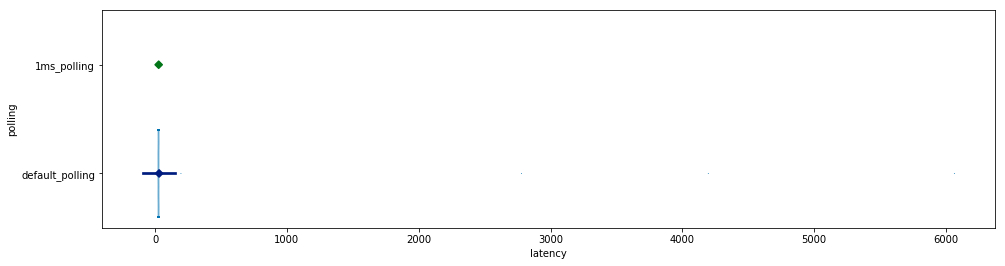

In [56]:
values = all_data[(all_data["device"] == "exxter")]


plt.figure(figsize=[16, 4])
#plt.title('Swarmplot of '+ values["device"])

ax = sns.pointplot((values["latency"]/1000), values["polling"], join=False, palette="dark", markers="D", scale=.75, ci="sd", zorder=1)
ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="colorblind", size=1, dodge=True, marker="H",orient="h", alpha=1, zorder=0)

plt.xlabel("latency (ms)")
plt.xlim(0, 100)

axes = plt.gca()
#axes.set_xlim(0,100)

(0, 100)

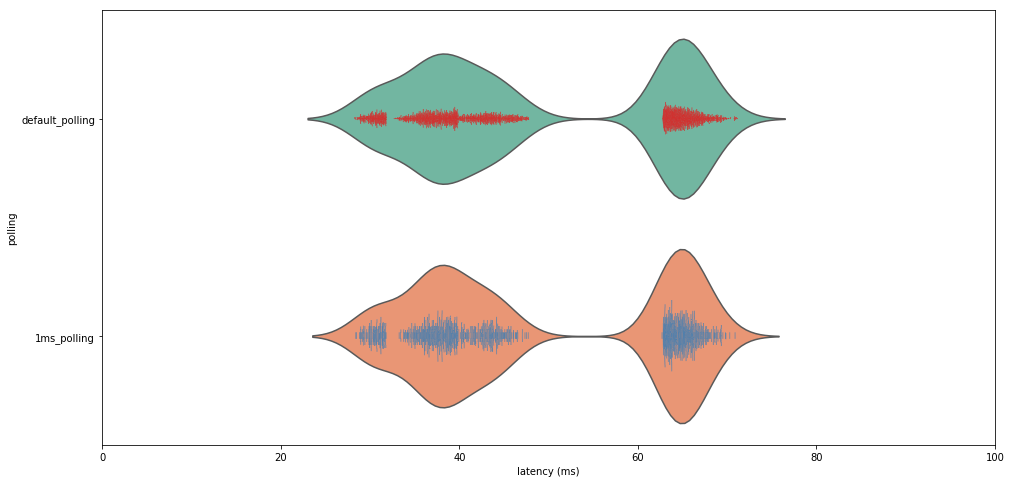

In [83]:
#Plotting a single swarmplot
values = all_data[(all_data["device"] == "6312kw")]

plt.figure(figsize=[16, 8])
#plt.title('Swarmplot of '+ values["device"])

#plt.figure()

ax = sns.swarmplot((values["latency"]/1000), values["polling"], hue=None, palette="Set1", size=1,marker ="H", orient="h", alpha=1)
ax = sns.violinplot((values["latency"]/1000), values["polling"], inner=None, palette="Set2", split=True )
plt.xlabel("latency (ms)")
plt.xlim(0, 100)

#axes = plt.gca()
#axes.set_xlim(0,100)